<a href="https://colab.research.google.com/github/6203kunu/6203kunu/blob/main/HEART_DISEASE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.IMPORTING LIBRARIES**

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

**2.DATA COLLECTION AND PROCESSING**

In [6]:
# LOADING CVS DATA USING PANDAS DATAFRAME
heart_data=pd.read_csv("/content/heart.csv")
print(heart_data)

     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      

In [7]:
#SHOWS FIRST FIVE ROWS DATA
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#SHOWS LAST FIVE ROWS DATA
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
#NUMBERS OF ROWS & COLUMNS IN GIVEN DATA
heart_data.shape

(303, 14)

In [10]:
#GETTING INFORMATION ABOUT DATA
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
#FINDING THE MISSING DATA
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
#STATICS OF GIVEN DATA
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
#CHECKING THE DISTRIBUTION OF TARGET VALUES
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

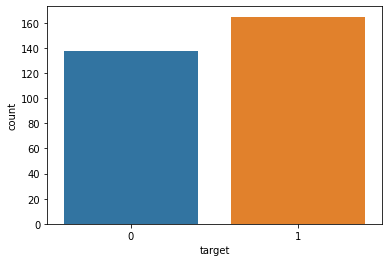

In [14]:
# Fixing Targets about the Disease
sns.countplot(x='target',data=heart_data)

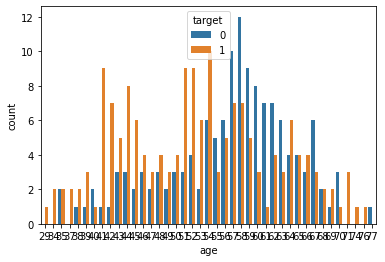

In [15]:
# Countplot for age and target
sns.countplot(x='age',hue='target',data=heart_data)

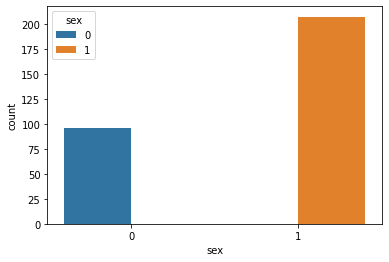

In [16]:
sns.countplot(x='sex',hue='sex',data=heart_data)

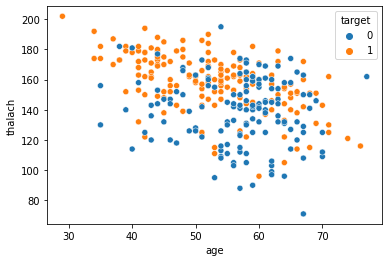

In [17]:
#scatter plot between age vs maximum heart rate
sns.scatterplot(x='age',y='thalach',hue='target',data=heart_data)

### **3.SPLITTING THE FEATURES & TARGETS**

In [18]:
x=heart_data.drop(columns="target",axis=1)
y=heart_data["target"]
print(x,y)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns] 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target

**4.SPLITTING THE DATA INTO TESTING AND TRAINING DATA**

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


**5.MODEL TRAINING**

In [20]:
# 1 Model Logistic Regression
model1=LogisticRegression()
model1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# 2 Model KNN
model2=KNeighborsClassifier(n_neighbors=2)
model2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [22]:
# 3 model GaussianNB
model3=GaussianNB()
model3.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
# 4 Model Decession Tree
model4=DecisionTreeClassifier()
model4.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**6.MODEL PREDICTION**

In [24]:
#ACCURACY ON TRAINING DATA

#MODEL 1
x_train_prediction=model1.predict(x_train)
training_data_accuracy1=accuracy_score(x_train_prediction,y_train)
print("accuracy for training data (model 1):",training_data_accuracy1*100)

#MODEL 2
x_train_prediction=model2.predict(x_train)
training_data_accuracy2=accuracy_score(x_train_prediction,y_train)
print("accuracy for training data (model 2):",training_data_accuracy2*100)

#MODEL 3
x_train_prediction=model3.predict(x_train)
training_data_accuracy3=accuracy_score(x_train_prediction,y_train)
print("accuracy for training data (model 3):",training_data_accuracy3*100)

#MODEL 4
x_train_prediction=model4.predict(x_train)
training_data_accuracy4=accuracy_score(x_train_prediction,y_train)
print("accuracy for training data (model 4):",training_data_accuracy4*100)

accuracy for training data (model 1): 85.12396694214877
accuracy for training data (model 2): 80.99173553719008
accuracy for training data (model 3): 84.71074380165288
accuracy for training data (model 4): 100.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


<function matplotlib.pyplot.show>

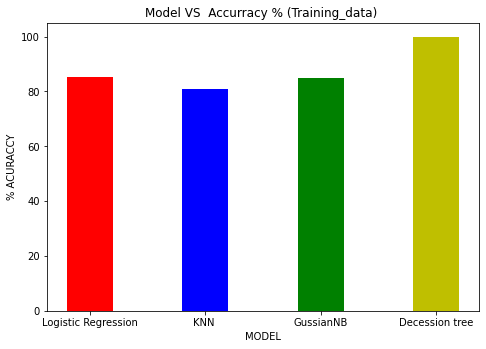

In [25]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
model=['Logistic Regression','KNN ','GussianNB','Decession tree']
accuracy_on_training_data=[training_data_accuracy1*100,training_data_accuracy2*100,training_data_accuracy3*100,training_data_accuracy4*100]
ax.bar(model,accuracy_on_training_data,color='rbgy', width=0.4)
plt.xlabel('MODEL')
plt.ylabel('% ACURACCY')
plt.title('Model VS  Accurracy % (Training_data) ')
plt.show

In [26]:
#ACCURACY ON TESTING DATA
#model1
x_test_prediction=model1.predict(x_test)
testing_data_accuracy1=accuracy_score(x_test_prediction,y_test)
print("accuracy for testing (model1):",testing_data_accuracy1*100)

#model2
x_test_prediction=model2.predict(x_test)
testing_data_accuracy2=accuracy_score(x_test_prediction,y_test)
print("accuracy for testing (model2):",testing_data_accuracy2*100)

#model3
x_test_prediction=model3.predict(x_test)
testing_data_accuracy3=accuracy_score(x_test_prediction,y_test)
print("accuracy for testing (model3):",testing_data_accuracy3*100)

#model4
x_test_prediction=model4.predict(x_test)
testing_data_accuracy4=accuracy_score(x_test_prediction,y_test)
print("accuracy for testing (model4):",testing_data_accuracy4*100)

accuracy for testing (model1): 81.9672131147541
accuracy for testing (model2): 50.81967213114754
accuracy for testing (model3): 81.9672131147541
accuracy for testing (model4): 81.9672131147541


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


<function matplotlib.pyplot.show>

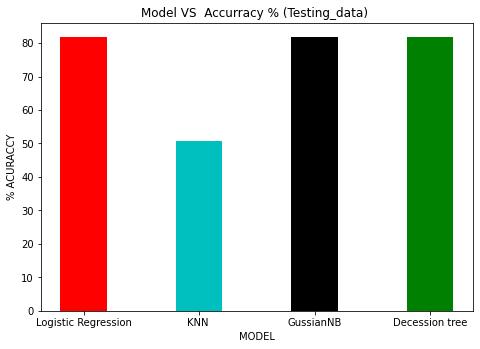

In [27]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
model=['Logistic Regression','KNN ','GussianNB','Decession tree']
accuracy_on_testing_data=[testing_data_accuracy1*100,testing_data_accuracy2*100,testing_data_accuracy3*100,testing_data_accuracy4*100]
ax.bar(model,accuracy_on_testing_data,color='rckg', width=0.4)
plt.xlabel('MODEL')
plt.ylabel('% ACURACCY')
plt.title('Model VS  Accurracy % (Testing_data) ')
plt.show

**7.BUILDING A PREDICTIVE SYSTEMS**

In [29]:
age=int(input("Enter age:"))
sex=int(input("Enter sex, 1=male,0=female:"))
Cp=int(input("Enter 1,2,3,4:"))
RBP=int(input("Enter resting blood pressure:"))
chol=int(input("Enter serum cholestoral in mg/dl:"))
fbs=int(input("Enter fasting blood sugar > 120 mg/dl:"))
restecg=int(input("Enter resting electrocardiographic results (values 0,1,2):"))
thalach=int(input("maximum heart rate achieved:"))
exang=int(input("enter exercise induced angina:"))
oldpeak=float(input(" ST depression induced by exercise relative to rest:"))
slope=int(input("Enter slope of the peak exercise ST segment:"))
ca=int(input("Enter number of major vessels (0-3) colored by flourosopy"))
thal=int(input("Enter thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"))

input_data=(age,sex,Cp,RBP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
print(input_data_as_numpy_array)
print(input_data_reshape)
prediction=model4.predict(input_data_reshape)
print(prediction)
print('Result')
print(" ")
if(prediction[0]==0):
  print("person dont have any heart issue")
else:
  print("person have heart issue")



Enter age:57
Enter sex, 1=male,0=female:0
Enter 1,2,3,4:0
Enter resting blood pressure:120
Enter serum cholestoral in mg/dl:354
Enter fasting blood sugar > 120 mg/dl:0
Enter resting electrocardiographic results (values 0,1,2):1
maximum heart rate achieved:178
enter exercise induced angina:0
 ST depression induced by exercise relative to rest:0.8
Enter slope of the peak exercise ST segment:2
Enter number of major vessels (0-3) colored by flourosopy0
Enter thal: 3 = normal; 6 = fixed defect; 7 = reversable defect2
[ 57.    0.    0.  120.  354.    0.    1.  178.    0.    0.8   2.    0.
   2. ]
[[ 57.    0.    0.  120.  354.    0.    1.  178.    0.    0.8   2.    0.
    2. ]]
[1]
Result
 
person have heart issue


In [ ]:
354